In [1]:
import tensorflow as tf
from reader import create_inputs
import json
import os

In [2]:
param_filename = "recog_params.json"
with open(param_filename, 'r') as f:
        recog_params = json.load(f)

In [3]:
image, label_value, label_shape, label_index = create_inputs(input_channel=1,
                                                             labels=recog_params['labels'],
                                                             dilations=recog_params['ctc_params']['cnn']['dilations'])

queue = tf.FIFOQueue(256, ['uint8', 'uint8', 'uint8', 'uint8'])
enqueue = queue.enqueue([image, label_value, label_shape, label_index])
input_data = queue.dequeue()

In [4]:
sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

coord = tf.train.Coordinator()
qr = tf.train.QueueRunner(queue, [enqueue])
qr.create_threads(sess, coord=coord, start=True)
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

In [5]:
d = sess.run(input_data)

(63, 107, 1)


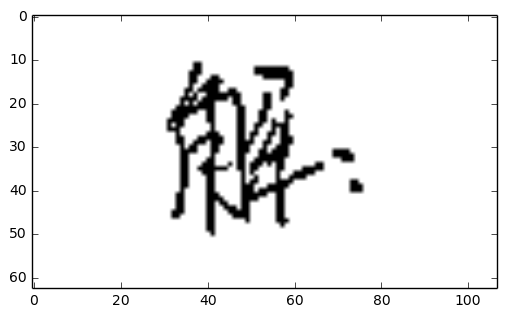

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
print(d[0].shape)
img = d[0].reshape([63, 107])
plt.imshow(img, cmap='gray')